# Logistic Regression from Scratch in TensorFlow

This notebook implements a simple binary logistic regression model from scratch using TensorFlow.

## 1. Import Libraries

In [1]:
from cProfile import label

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.bipartite.basic import color

## 2. Generate Toy Data

In [2]:
num_samples = 100
X = np.random.randn(num_samples, 2).astype(np.float32)
y = (X[:, 0] + X[:, 1] > 0).astype(np.int32)
X

array([[ 7.34749973e-01, -7.49126911e-01],
       [ 3.07525545e-01, -1.00999117e+00],
       [-2.89694160e-01,  8.32796395e-01],
       [-1.71421182e+00,  7.65176415e-02],
       [-3.91783506e-01, -5.44308424e-01],
       [ 8.39524567e-01,  7.26506114e-01],
       [ 1.04666018e+00,  1.27746141e+00],
       [-1.43800569e+00, -1.30712891e+00],
       [-1.66051185e+00,  4.59068745e-01],
       [ 6.27096057e-01, -8.12665403e-01],
       [-7.54809141e-01, -9.81211364e-01],
       [-3.36366668e-02, -6.22419655e-01],
       [ 1.53351378e+00,  2.59160757e-01],
       [ 7.92830288e-01, -1.21678555e+00],
       [ 4.66053456e-01, -3.65621299e-01],
       [ 9.32337582e-01, -1.96079028e+00],
       [ 1.83556604e+00, -1.43060994e+00],
       [ 5.01761317e-01, -4.44512576e-01],
       [-1.98271024e+00, -1.03665984e+00],
       [ 4.97752130e-01,  1.83261037e+00],
       [ 9.22238290e-01,  7.94858754e-01],
       [ 1.35947013e+00, -2.36985588e+00],
       [-3.73785079e-01, -2.14125276e+00],
       [-8.

## 3. Define Model Parameters

In [3]:
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.zeros([1]))

## 4. Define the Model

In [4]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


def logistic_regression(x):
    return sigmoid(tf.matmul(x, W) + b)

## 5. Define the Loss Function

In [5]:
def loss_fn(y_true, y_pred):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

## 6. Define the Optimizer

In [6]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

## 7. Training Loop

In [7]:
epochs = 1000
losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(X)
        loss = loss_fn(y.reshape(-1, 1), y_pred)

    losses.append(loss.numpy())

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy():.4f}')

Epoch 100/1000, Loss: 0.8788
Epoch 200/1000, Loss: 0.6649
Epoch 300/1000, Loss: 0.5226
Epoch 400/1000, Loss: 0.4322
Epoch 500/1000, Loss: 0.3739
Epoch 600/1000, Loss: 0.3346
Epoch 700/1000, Loss: 0.3067
Epoch 800/1000, Loss: 0.2859
Epoch 900/1000, Loss: 0.2697
Epoch 1000/1000, Loss: 0.2567


## 8. Visualize the Results

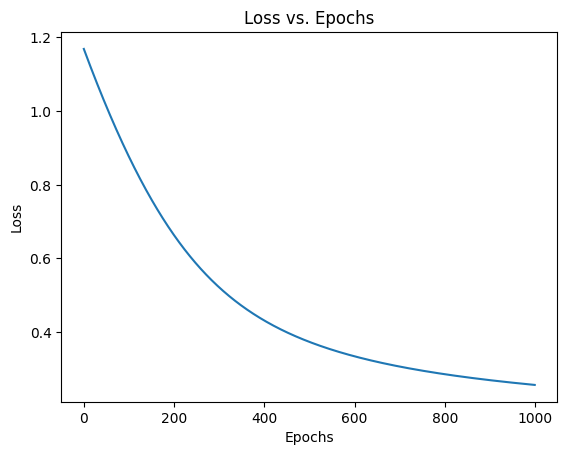

In [8]:
plt.plot(losses)
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

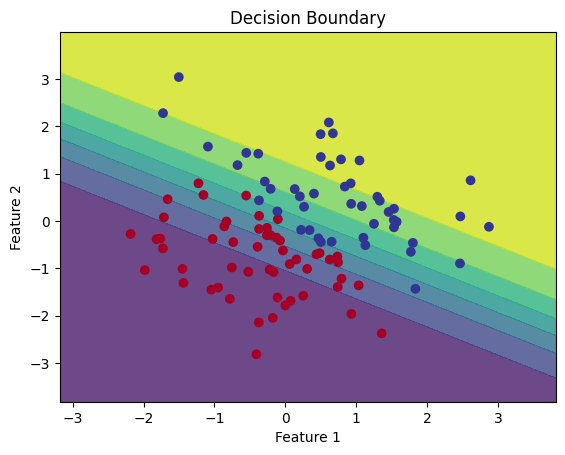

In [9]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
grid = np.c_[xx1.ravel(), xx2.ravel()].astype(np.float32)
probs = logistic_regression(grid).numpy().reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train.reshape(-1, 1), dtype=tf.float32)
y_test = tf.constant(y_test.reshape(-1, 1), dtype=tf.float32)

W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))


def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


learning_rate = 0.1
epochs = 300
losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = sigmoid(tf.matmul(X_train, W) + b)
        loss = tf.reduce_mean(-(y_train * tf.math.log(y_pred + 1e-9) +
                        (1 - y_train) * tf.math.log(1 - y_pred + 1e-9)))

    grad = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * grad[0])
    b.assign_sub(learning_rate * grad[1])
    losses.append(loss.numpy())
print("Final Loss:", losses[-1])

Final Loss: 0.36509737


Text(0, 0.5, 'Feature 2')

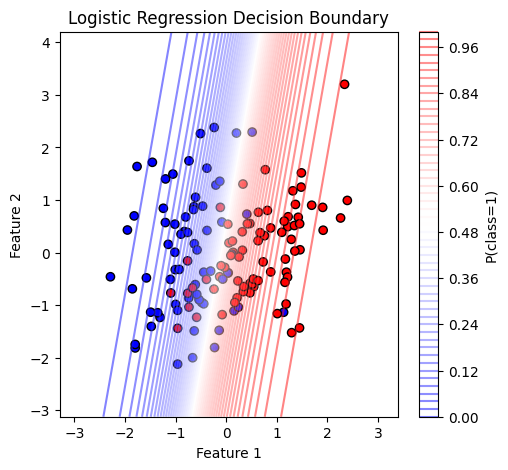

In [11]:
## mesh grid

x_min, x_max = X_train[:, 0].numpy().min() - 1, X_train[:, 0].numpy().max() + 1
y_min, y_max = X_train[:, 1].numpy().min() - 1, X_train[:, 1].numpy().max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = tf.constant(grid, dtype=tf.float32)

probs = tf.sigmoid(tf.matmul(grid_tensor, W) + b).numpy().reshape(xx.shape)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contour(xx, yy, probs, levels=50, cmap='bwr', alpha=0.5)
plt.colorbar(label="P(class=1)")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0], cmap="bwr", edgecolors="k")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

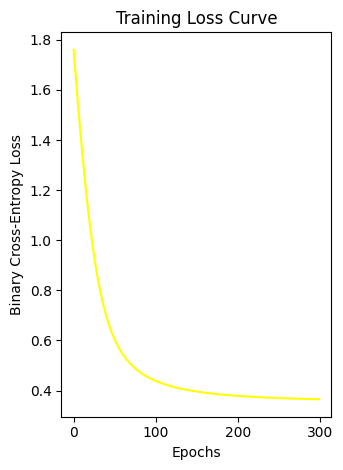

In [12]:
plt.subplot(1, 2, 2)
plt.plot(losses, color='yellow')
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.tight_layout()
plt.show()